In [3]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [4]:
# Read the data
df = pd.read_csv('./datasets/cookie_cats.csv')
print(f'There are {df.shape[0]:,} users and {df.shape[1]:,} features in this dataset')
df.head()

There are 90,189 users and 5 features in this dataset


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
# check for null values
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
# check for column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


## Sanity Check

In [7]:
# Counting the number of players in each AB group.
df['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

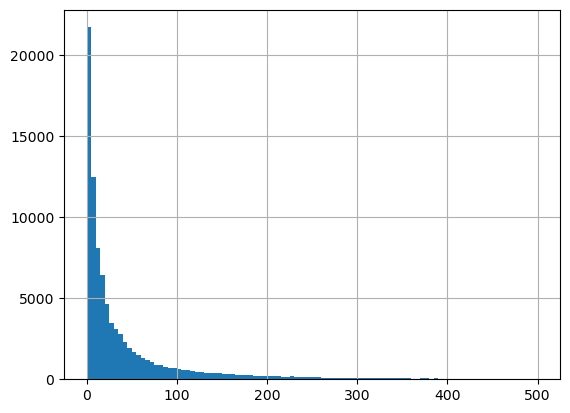

In [13]:
# Plotting the distribution of users who played 0 to 100 game rounds
df.loc[df['sum_gamerounds']<=500,'sum_gamerounds'].hist(bins = 100);

## 1-day retention

In [126]:
# The % of users that came back the day after they installed
retenton_1d = df['retention_1'].mean()
print(f'Overall 1 day retention rate: {retenton_1d:.2%}')

# Calculating 1-day retention for each AB group
df.groupby(['version'])['retention_1'].mean()*100

Overall 1 day retention rate: 44.52%


version
gate_30    44.818792
gate_40    44.228275
Name: retention_1, dtype: float64

In [129]:
d1_30 = df.loc[df['version'] == 'gate_30', 'retention_1'].mean()
d1_40 = df.loc[df['version'] == 'gate_40', 'retention_1'].mean()
d1_diff = d1_30 - d1_40

print(f'change in 1-day retention from 30 day to 40 day is: {d1_diff:.2%}')

change in 1-day retention from 30 day to 40 day is: 0.59%


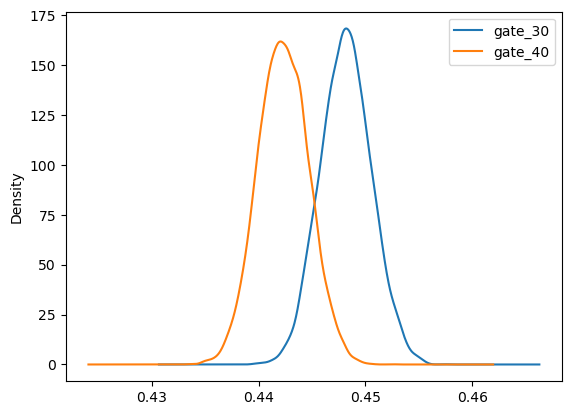

In [59]:
# Creating an list with bootstrapped means for each AB group
n = int(1e4)
boot_1d = np.empty([n, 2])
for i in range(n):
    boot_mean = df.sample(frac=1, replace=True).groupby(['version'])['retention_1'].mean()
    boot_1d[i] = boot_mean
    
#Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d, columns = ['gate_30','gate_40'])

#A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde();

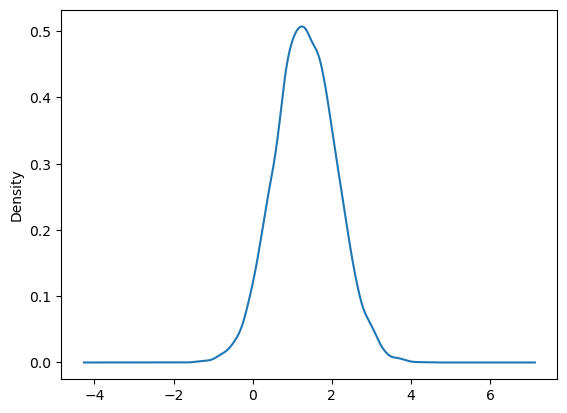

In [68]:
# Adding a column with the % difference between the two AB groups
boot_1d['diff'] = 100*(boot_1d['gate_30'] - boot_1d['gate_40'])/boot_1d['gate_40']

# Ploting the bootstrap % difference
boot_1d['diff'].plot.kde();

In [98]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob_1d = (boot_1d['diff']> 0).mean()

# Printing the probability
print(f'{prob_1d:.2%}')

96.13%


There is a high probability that 1-day retention is better when the gate is at level 30, but it is likely that most players haven't reached level 30 or 40 yet since it has only been 1 day. Therefore it makes more sense to also look at 7-day retention as it is more likely that players have reached level 30 or 40.

## 7-day retention

In [85]:
# The % of users that came back the 7 days after they installed
retenton_7d = df['retention_7'].mean()
print(f'Overall 7 day retention rate: {retenton_7d:.2%}')

# Calculating 7-day retention for each AB group
df.groupby(['version'])['retention_7'].mean()*100

Overall 7 day retention rate: 18.61%


version
gate_30    19.020134
gate_40    18.200004
Name: retention_7, dtype: float64

In [94]:
d7_30 = df.loc[df['version'] == 'gate_30', 'retention_7'].mean()
d7_40 = df.loc[df['version'] == 'gate_40', 'retention_7'].mean()
d7_diff = d7_30 - d7_40

print(f'change in 7-day retention from 30 day to 40 day is: {d7_diff:.2%}')

change in 7-day retention from 30 day to 40 day is: 0.82%


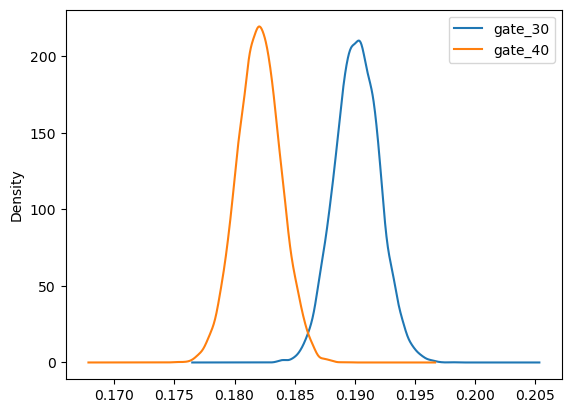

In [102]:
# Creating an list with bootstrapped means for each AB group
n = int(1e4)
boot_7d = np.empty([n, 2])
for i in range(n):
    boot_mean = df.sample(frac=1, replace=True).groupby(['version'])['retention_7'].mean()
    boot_7d[i] = boot_mean
    
#Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d, columns = ['gate_30','gate_40'])

#A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot.kde();

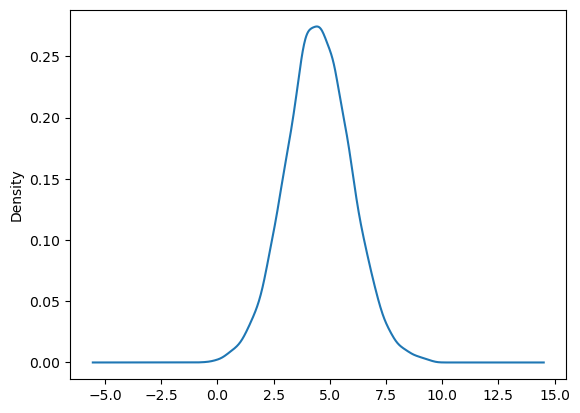

In [103]:
# Adding a column with the % difference between the two AB groups
boot_7d['diff'] = 100*(boot_7d['gate_30'] - boot_7d['gate_40'])/boot_7d['gate_40']

# Ploting the bootstrap % difference
boot_7d['diff'].plot.kde();

In [104]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob_7d = (boot_7d['diff']> 0).mean()

# Pretty printing the probability
print(f'{prob_7d:.2%}')

99.94%


The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. 

Therefore, if we want to increase retention (both 1-day and 7-day), we should move the gate from level 40 to level 30, as the experient showed ealier the obstacle, the longer people are going to engage with the game.